In [5]:
from langgraph.graph import Graph
from langgraph.graph import StateGraph
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
langgraph->orchestration->pipeline

In [ ]:
langgraph->nodes,edges,State
node->funtions
edage-> connectivity between nodes(funtions)

In [6]:
# from langchain_google_genai import GoogleGenerativeAIEmbeddings
# embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
# from langchain_google_genai import ChatGoogleGenerativeAI
# llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

In [7]:
import os
OPENAI_API_KEY=os.getenv("OPENAI_API_KEY")
os.environ["OPENAI_API_KEY"]=OPENAI_API_KEY
openai_model=ChatOpenAI(model="gpt-4o")
openai_model.invoke("hi").content

'Hello! How can I assist you today?'

In [8]:
def LLM(input):
    llm = ChatOpenAI(model="gpt-4o") #creating a object of chat openai class
    response=llm.invoke(input).content
    return response
    

In [10]:
LLM("what is '3+3*10-15' just give me final output dont give any other stuff.")

'18'

In [12]:
def Counter_Token(input):
    token=input.split()
    token_number=len(token)
    response=f"total number of token in the generated output {token_number}"
    return response
    

In [14]:
Counter_Token("hi my name is sunny savita and i am working with some xya abc dqw company kdgk hsklhdgfsd hslkghsd sjhlkhlsdfg klshgls")

'total number of token in the generated output 21'

In [20]:
workflow=Graph()

In [21]:
workflow.add_node("MY LLM",LLM)

In [22]:
workflow.add_node("Token Counter",Counter_Token) 

In [23]:
workflow.add_edge("MY LLM", "Token Counter")

In [24]:
workflow.set_entry_point("MY LLM")
workflow.set_finish_point("Token Counter")

In [25]:
app=workflow.compile()

In [26]:
from IPython.display import Image, display

In [27]:
app.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langgraph.graph.graph.LangGraphInput'>, metadata=None), 'MY LLM': Node(id='MY LLM', name='MY LLM', data=MY LLM(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'Token Counter': Node(id='Token Counter', name='Token Counter', data=Token Counter(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langgraph.graph.graph.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='MY LLM', target='Token Counter', data=None, conditional=False), Edge(source='Token Counter', target='__end__', data=None, conditional=False), Edge(source='__start__', target='MY LLM', data=None, conditional=False)])

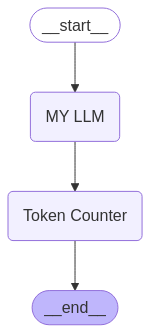

In [28]:
display(Image(app.get_graph().draw_mermaid_png())) 

In [29]:
app.invoke("what is a agentic ai explain me in very detailed manner?")

'total number of token in the generated output 683'

In [30]:
for output in app.stream("what is a agentic ai explain me in very detailed manner?"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from MY LLM
_______
Agentic AI refers to artificial intelligence systems that exhibit agency, meaning they have the ability to make autonomous decisions and take actions to achieve specific goals. This concept is crucial in understanding how AI systems can interact with complex environments, make choices, and influence outcomes without direct human intervention. Here's a detailed explanation of what agentic AI entails:

### Characteristics of Agentic AI:

1. **Autonomy:**
   - Autonomy is the core attribute of agentic AI. These systems operate independently, making decisions based on their programming and data inputs rather than relying on constant human guidance.
   - Autonomy in AI involves the ability to perform tasks or solve problems with minimal human oversight, although the level of autonomy can vary based on the design and intended application of the AI system.

2. **Goal-Directed Behavior:**
   - Agentic AI systems are designed to pursue specific goals or object

In [32]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
loader=DirectoryLoader("../data",glob="./*.txt",loader_cls=TextLoader)
docs=loader.load()
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=300,
    chunk_overlap=150
)
new_docs = text_splitter.split_documents(documents=docs)


In [46]:
doc_strings = [doc.page_content for doc in new_docs]

In [47]:
doc_strings

["Industrial revival hope for Japan\n\nJapanese industry is growing faster than expected, boosting hopes that the country's retreat back into recession is over.",
 'Industrial output rose 2.1% - adjusted for the time of year - in January from a month earlier. At the same time, retail sales picked up faster than at any time since 1997. The news sent Tokyo shares to an eight-month high, as investors hoped for a recovery from the three quarters of contraction',
 'at any time since 1997. The news sent Tokyo shares to an eight-month high, as investors hoped for a recovery from the three quarters of contraction seen from April 2004 on. The Nikkei 225 index ended the day up 0.7% at 11,740.60 points, with the yen strengthening 0.7% against the dollar to 104.53',
 "seen from April 2004 on. The Nikkei 225 index ended the day up 0.7% at 11,740.60 points, with the yen strengthening 0.7% against the dollar to 104.53 yen. Weaker exports, normally the engine for Japan's economy in the face of weak do

In [38]:

from langchain_openai import OpenAIEmbeddings
embeddings=OpenAIEmbeddings(model='text-embedding-3-large')

In [39]:
db = Chroma.from_documents(new_docs, embeddings)

retriever = db.as_retriever(search_kwargs={"k": 3})

In [42]:
# db = Chroma.from_documents(new_docs, embeddings)

# retriever = db.as_retriever(search_kwargs={"k": 3})

query = "why Japanese industry is growing faster?"
docs = retriever.get_relevant_documents(query)

In [43]:
docs

[Document(metadata={'source': '..\\data\\japan.txt'}, page_content="Industrial revival hope for Japan\n\nJapanese industry is growing faster than expected, boosting hopes that the country's retreat back into recession is over."),
 Document(metadata={'source': '..\\data\\japan.txt'}, page_content='Industrial output rose 2.1% - adjusted for the time of year - in January from a month earlier. At the same time, retail sales picked up faster than at any time since 1997. The news sent Tokyo shares to an eight-month high, as investors hoped for a recovery from the three quarters of contraction'),
 Document(metadata={'source': '..\\data\\japan.txt'}, page_content="yen. Weaker exports, normally the engine for Japan's economy in the face of weak domestic demand, had helped trigger a 0.1% contraction in the final three months of last year after two previous quarters of shrinking GDP. Only an exceptionally strong performance in the early months of 2004 kept the")]

In [44]:
print(docs[0].metadata)
print(docs[0].page_content)

{'source': '..\\data\\japan.txt'}
Industrial revival hope for Japan

Japanese industry is growing faster than expected, boosting hopes that the country's retreat back into recession is over.


In [45]:
for doc in docs:
    print(doc)

page_content='Industrial revival hope for Japan

Japanese industry is growing faster than expected, boosting hopes that the country's retreat back into recession is over.' metadata={'source': '..\\data\\japan.txt'}
page_content='Industrial output rose 2.1% - adjusted for the time of year - in January from a month earlier. At the same time, retail sales picked up faster than at any time since 1997. The news sent Tokyo shares to an eight-month high, as investors hoped for a recovery from the three quarters of contraction' metadata={'source': '..\\data\\japan.txt'}
page_content='yen. Weaker exports, normally the engine for Japan's economy in the face of weak domestic demand, had helped trigger a 0.1% contraction in the final three months of last year after two previous quarters of shrinking GDP. Only an exceptionally strong performance in the early months of 2004 kept the' metadata={'source': '..\\data\\japan.txt'}


In [48]:
AgentState={}

In [49]:
AgentState["messages"]=[]

In [50]:
#manually i had created 
AgentState

{'messages': []}

In [51]:
AgentState["messages"].append("hi")

In [52]:
AgentState

{'messages': ['hi']}

In [53]:
AgentState["messages"].append("how are you?")

In [54]:
AgentState

{'messages': ['hi', 'how are you?']}

In [55]:
AgentState["messages"].append("what are you doing?")

In [56]:
# We are flowing this state across the different different nodes inside the langgraph workflow
AgentState

{'messages': ['hi', 'how are you?', 'what are you doing?']}

In [57]:
# this is my older message
AgentState["messages"][0]

'hi'

In [58]:
#recent added message or latest message
AgentState["messages"][-1]

'what are you doing?'

In [59]:
AgentState={'messages': []}

In [60]:
def function_1(AgentState):
    message=AgentState["messages"]
    
    question=message[-1]
    
    complete_prompt="Your task is to provide only the brief answer based on the user query. \
        Don't include too much reasoning. Following is the user query: " + question
    
    response = openai_model.invoke(complete_prompt)
    
    AgentState['messages'].append(response.content) # appending LLM call response to the AgentState
    
    #print(AgentState)
    
    return AgentState
   
def function_2(AgentState):
    messages = AgentState['messages']
    
    question = messages[0] ## Fetching the user question
    
    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | openai_model
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return result
    

In [61]:
workflow=Graph()
workflow.add_node("LLM", function_1)
workflow.add_node("RAGtool", function_2)
workflow.add_edge('LLM', 'RAGtool')
workflow.set_entry_point("LLM")
workflow.set_finish_point("RAGtool")
app2 = workflow.compile()


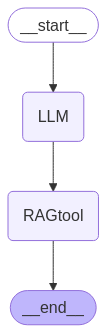

In [62]:
display(Image(app2.get_graph().draw_mermaid_png())) 

In [63]:
app2.invoke({"messages":["why japan is growing more than other asian country?"]})

'The provided context does not explicitly state why Japan is growing more than other Asian countries. It mentions that Japanese industry is growing faster than expected, which is boosting hopes of economic recovery, but it does not provide a comparative analysis with other Asian countries.'

In [64]:
for output in app2.stream({"messages":["why japan is growing more than other asian country?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from LLM
_______
{'messages': ['why japan is growing more than other asian country?', "Japan's growth can be attributed to its advanced technology, strong manufacturing sector, and effective economic policies."]}


here is output from RAGtool
_______
The context provided does not specify the reasons why Japan is growing more than other Asian countries. It mentions that Japanese industry is growing faster than expected and that there is hope for an industrial revival, suggesting that recent industrial growth is driving economic improvement. However, without specific comparisons to other Asian countries or detailed factors contributing to Japan's growth relative to others, the context does not directly answer the question of why Japan's growth outpaces other Asian countries.




In [1]:
print("all ok")

all ok


In [65]:
loader=DirectoryLoader("../data",glob="./*.txt",loader_cls=TextLoader)
docs=loader.load()
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs = text_splitter.split_documents(documents=docs)
doc_strings = [doc.page_content for doc in new_docs]

In [12]:
new_docs

[Document(metadata={'source': '..\\data\\japan.txt'}, page_content='Industrial revival hope for Japan'),
 Document(metadata={'source': '..\\data\\japan.txt'}, page_content="Japanese industry is growing faster than expected, boosting hopes that the country's retreat back"),
 Document(metadata={'source': '..\\data\\japan.txt'}, page_content="boosting hopes that the country's retreat back into recession is over."),
 Document(metadata={'source': '..\\data\\japan.txt'}, page_content='Industrial output rose 2.1% - adjusted for the time of year - in January from a month earlier. At'),
 Document(metadata={'source': '..\\data\\japan.txt'}, page_content='of year - in January from a month earlier. At the same time, retail sales picked up faster than at'),
 Document(metadata={'source': '..\\data\\japan.txt'}, page_content='same time, retail sales picked up faster than at any time since 1997. The news sent Tokyo shares to'),
 Document(metadata={'source': '..\\data\\japan.txt'}, page_content='time s

In [66]:
doc_strings

['Industrial revival hope for Japan',
 "Japanese industry is growing faster than expected, boosting hopes that the country's retreat back",
 "boosting hopes that the country's retreat back into recession is over.",
 'Industrial output rose 2.1% - adjusted for the time of year - in January from a month earlier. At',
 'of year - in January from a month earlier. At the same time, retail sales picked up faster than at',
 'same time, retail sales picked up faster than at any time since 1997. The news sent Tokyo shares to',
 'time since 1997. The news sent Tokyo shares to an eight-month high, as investors hoped for a',
 'to an eight-month high, as investors hoped for a recovery from the three quarters of contraction',
 'a recovery from the three quarters of contraction seen from April 2004 on. The Nikkei 225 index',
 'seen from April 2004 on. The Nikkei 225 index ended the day up 0.7% at 11,740.60 points, with the',
 'the day up 0.7% at 11,740.60 points, with the yen strengthening 0.7% again

In [67]:
db = Chroma.from_documents(new_docs, embeddings)

retriever = db.as_retriever(search_kwargs={"k": 3})

In [68]:
query = "Tell me about India's Industrial Growth?"
docs = retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

{'source': '..\\data\\japan.txt'}
Industrial revival hope for Japan

Japanese industry is growing faster than expected, boosting hopes that the country's retreat back into recession is over.


In [69]:
docs

[Document(metadata={'source': '..\\data\\japan.txt'}, page_content="Industrial revival hope for Japan\n\nJapanese industry is growing faster than expected, boosting hopes that the country's retreat back into recession is over."),
 Document(metadata={'source': '..\\data\\japan.txt'}, page_content='Within the overall industrial output figure, there were signs of a pullback from the export slowdown. Among the best-performing sectors were key overseas sales areas such as cars, chemicals and electronic goods. With US growth doing better than expected the picture for exports in early 2005 could'),
 Document(metadata={'source': '..\\data\\japan.txt'}, page_content='Industrial revival hope for Japan')]

In [70]:
from typing import TypedDict, Annotated,Sequence

In [71]:
import operator

In [72]:
from langchain_core.messages import BaseMessage

In [73]:
from langchain.prompts import PromptTemplate

In [80]:
#AgentState

In [75]:
state={"messages":["hi","how are you?","what is a japan GDP?","which is good model in llm world?"]}

In [76]:
#last message inside the message list
state["messages"][-1]

'which is good model in llm world?'

In [77]:
#first message from the message list
state["messages"][0]

'hi'

In [81]:
class AgentState(TypedDict):
    messages:Annotated[Sequence[BaseMessage],operator.add]

In [82]:
from langchain_core.messages import HumanMessage

In [34]:
state=AgentState(messages=[HumanMessage(content="hi there")])

In [35]:
state

{'messages': [HumanMessage(content='hi there', additional_kwargs={}, response_metadata={})]}

In [85]:
state=AgentState(messages=["sunny sunny sunny"])

In [86]:
state

{'messages': ['sunny sunny sunny']}

In [88]:
from pydantic import BaseModel, Field

In [89]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description="reasoning behind the topic")

In [90]:
pydantic_obj=TopicSelectionParser(Topic="india", Reasoning="india is growing country?")

In [91]:
pydantic_obj.Topic

'india'

In [92]:
pydantic_obj.Reasoning

'india is growing country?'

In [100]:
from langchain.output_parsers import PydanticOutputParser

In [101]:
parser=PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [102]:
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "reasoning behind the topic", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```


In [95]:
def function_1(state:AgentState):
    
    message=state["messages"]
    
    question=message[-1] 
    
    print("***********here is my question********")
    print(question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [Japan, Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    
    {format_instructions}
    """
    
    prompt = PromptTemplate(template=template,
                            input_variables=[question],
                            partial_variables={"format_instructions" : parser.get_format_instructions()}
                            )
    
    chain =prompt | openai_model | parser
    
    response = chain.invoke({"question":question,"format_instructions" : parser.get_format_instructions() })
    
    print("***********my response********")
    print(response)
    
    return {"messages":[response.Topic]}

In [96]:
state={"messages":["tell me about the japan's industrial growth?"]}

In [97]:
state={"messages":["hi how are you?"]}

In [98]:
state

{'messages': ['hi how are you?']}

In [103]:
function_1(state)

***********here is my question********
hi how are you?
***********my response********
Topic='Not Related' Reasoning="The query 'hi how are you?' does not reference or relate to Japan in any way."


{'messages': ['Not Related']}

In [104]:
def router(state:AgentState):
    print("***********entering into router********")
    print("*********my state from router********")
    print(state)
    
    message=state["messages"]
    
    last_message=message[-1]
    
    print("***********last message********")    
    print(last_message)
    
    if "Japan" in last_message:
        return "RAG Call"
    else:
        return "Simple LLM Call"

In [105]:
def function_2(state:AgentState):
    print("*********my state from function_2(rag)********")
    print(state)
    
    
    print('-> Calling RAG ->')
    
    messages = state['messages']
    
    question = messages[0] ## Fetching the user question
    
    print(question)

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)
    
    print(prompt)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | openai_model
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    response={"messages": [result]}
    print("*********my state from function_2(rag)********")
    print(state)
    return response
    

In [106]:
def function_3(state:AgentState):
    print('-> Calling LLM ->')

    messages = state['messages']
    
    question = messages[0] ## Fetching the user question

    # Normal LLM call
    complete_query = "Anwer the follow question with your knowledge of the real world. Following is the user question: " + question
    response = openai_model.invoke(complete_query)
    response={"messages": [response.content]}
    print("*********my state from function_3(LLM)********")
    print(state)
    return response

In [108]:
from langgraph.graph import StateGraph, END

In [109]:
workflow=StateGraph(AgentState)

In [110]:
workflow.add_node("supervisor",function_1)

In [111]:
workflow.add_node("RAG",function_2)

In [112]:
workflow.add_node("LLM",function_3)

In [113]:
workflow.set_entry_point("supervisor")

In [114]:
workflow.add_conditional_edges(
    "supervisor",
    router,
    {
        "RAG Call": "RAG",
        "Simple LLM Call": "LLM"
    },
    
)

In [115]:
workflow.add_edge("RAG",END)


workflow.add_edge("LLM",END)


app=workflow.compile()

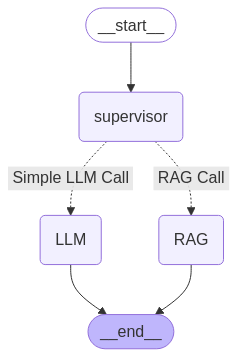

In [116]:
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
response=app.invoke({"messages":["can you tell me about the japan industrial growth with GDP?"]})

***********here is my question********
can you tell me about the japan industrial growth with GDP?
***********my response********
Topic='Japan' Reasoning="The query specifically asks about Japan's industrial growth and GDP, which is directly related to the topic of Japan."
***********entering into router********
*********my state from router********
{'messages': ['can you tell me about the japan industrial growth with GDP?', 'Japan']}
***********last message********
Japan
*********my state from function_2(rag)********
{'messages': ['can you tell me about the japan industrial growth with GDP?', 'Japan']}
-> Calling RAG ->
can you tell me about the japan industrial growth with GDP?
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question

: 

In [163]:
response

{'messages': ['can you tell me about the japan industrial growth with GDP?',
  'Japan',
  'Japan experienced three quarters of contraction starting from April 2004, followed by a recovery.  There is also mention of "industrial revival hope".  However, no specific GDP figures or their relationship to industrial growth are provided.']}

In [111]:
response["messages"][-1]

"Japan experienced three quarters of contraction starting from April 2004, followed by a recovery. There are hopes for an industrial revival.  The provided context doesn't give specific GDP numbers or link the recovery directly to industrial growth."

In [125]:
response=app.invoke({"messages":["hi how are you?"]})

***********my question********
hi how are you?
***********my response********
Topic='Not Related' Reasoning='The query is a general greeting and does not mention Japan or any related topics.'
***********my router********
***********last message********
Not Related
-> Calling LLM ->


In [126]:
response["messages"][-1]

"I'm doing well, thank you for asking! How are you?"

In [127]:
for output in app.stream({"messages":["what is a age of donald trump?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

***********my question********
what is a age of donald trump?
***********my response********
Topic='Not Related' Reasoning="The query asks about Donald Trump's age, which has no relation to Japan."
***********my router********
***********last message********
Not Related
here is output from supervisor
_______
{'messages': ['Not Related']}


-> Calling LLM ->
here is output from LLM
_______
{'messages': ['Donald Trump was born on June 14, 1946.  Therefore, as of October 26, 2023, he is 77 years old.']}




In [ ]:
very useful method for routing in multiagent system
command()